# Promoter Test

In this experiment, we have tried three different candidate promoters: Arabinose, Lac (via IPTG) annd Rhamnose

In [3]:
%matplotlib inline

import sys
sys.path.insert(0, '../../')
import BrasilUSP_iGEM_LabLib as LabLib

import scipy.stats
import pylab as pl
import numpy as np
import glob
from math import sqrt



## Definitions...

def biolrepl(wells):
    return np.array( [ wells[0:3].mean(), wells[3:6].mean(), wells[6:9].mean() ] ), \
        np.array( [ np.std(wells[0:3]), np.std(wells[3:6]), np.std(wells[6:9]) ] )

ColumnNames = { 
    'Rha' : {
    'A' : "-control",
    'B' : "+control",
    'C' : "ZeroC",
    'D' : "C1",
    'E' : "C2",
    'F' : "C3",
    'G' : "C4",
    'H' : "LB",
    },
    'Lac' : {
    'A' : "-control",
    'B' : "+control",
    'C' : "ZeroC",
    'D' : "C1",
    'E' : "C2",
    'F' : "C3",
    'G' : "C4",
    'H' : "C5",
    }
}

Pidxs = ['Rha', 'Lac']
Pcolors = {'Rha' : (1.0,0.5,0.3), 'Lac' : (0.3,0.5,1.0)}
Pcolors_light = {'Rha' : (1.0,0.8,0.6), 'Lac' : (0.6,0.8,1.0)}


MeaningColNames = {}
for P in Pidxs:
    MeaningColNames[P] = {v : k for k, v in ColumnNames[P].items()}


def allCols(P, labels, r0 = 1, rf = 9):
    if type(labels) != list: 
        labels = [labels]
    cols = []
    for label in labels:
        row  = MeaningColNames[P][label]
        for j in range(r0,rf+1):
            cols.append(row + '0' + str(j))
    return cols

### Reading measurements

In [4]:
FLlist = {}
tidx = {}
for P in Pidxs: 
    FLlist[P] = []
    tidx[P] = []

for P in Pidxs:
    for file in glob.glob("fluorescencia/t1 p"+P+" amp/*.txt"):
        tidx[P].append( float( file.split(' ')[5].split('.')[0] ) )
        FLlist[P].append(file)

for P in Pidxs: 
    Idx = np.argsort(tidx[P])
    FLlist[P] = np.array(FLlist[P])[Idx]

Let now read the data. In this experiment, we have recordings from two different wavelengths, regarding Gfp and Rfp proteins. Let's start reading GFP.

In [5]:
fldata = {}
for P in Pidxs:
    fldata[P] = LabLib.ReadFluor_timefmt_nanomed(FLlist[P])
fldata['Rha'][allCols('Rha', 'LB')].head(3)

,H01,H02,H03,H04,H05,H06,H07,H08,H09
0,973.896,456.955,768.313,794.161,812.480,822.826,746.937,899.649,936.921
1,944.393,331.337,714.537,728.882,783.248,784.801,761.684,881.975,917.609
2,910.712,441.862,756.646,738.697,794.079,780.024,706.511,882.862,938.685


Next, we read the Rfp data.

In [6]:
fldata_rfp = {}
for P in Pidxs:
    fldata_rfp[P] = LabLib.ReadFluor_timefmt_nanomed(FLlist[P], datarow=2)
fldata_rfp['Rha'][allCols('Rha', 'LB')].head(3)

,H01,H02,H03,H04,H05,H06,H07,H08,H09
0,2946.979,584.353,2109.635,1752.711,1968.205,1890.664,2057.697,2459.482,2578.938
1,3028.926,366.711,2054.213,1471.049,1803.972,1719.443,1973.770,2353.374,2510.841
2,3186.496,372.161,2168.334,1538.603,1940.322,1696.944,1999.869,2425.017,2494.651


Since we have three different plates, one for each promoter, let's quickly check the temperature in each plate separately.

/usr/lib64/python2.7/site-packages/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


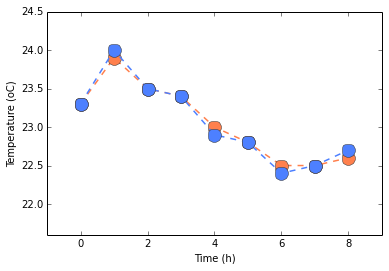

In [7]:
for P in Pidxs:
    pl.plot(fldata[P]['T(oC)'], 'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2))

pl.xlabel('Time (h)')
pl.xlim(-1,9)
pl.ylabel('Temperature (oC)')
pl.ylim(21.6,24.5)
pl.legend(bbox_to_anchor=(0.9, 0.4))
pl.show()

Temperature seems quite reasonable accross different boards.

### OD measurements

In [8]:
oddata = {}
for P in Pidxs:
    ODlist = []
    for j in range(10):
        ODlist.append("OD/od p"+P+" teste 1/OD "+str(j)+" p"+P+" t1.txt")
    
    oddata[P] = LabLib.ReadFluor_timefmt_nanomed(ODlist, nr_header=2)

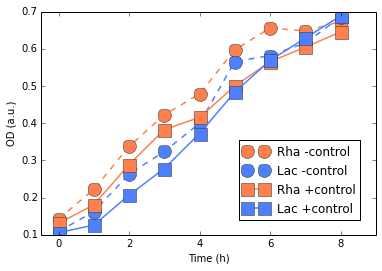

In [9]:
for P in Pidxs:
    pl.plot(np.mean(np.array(oddata[P][allCols(P,'-control')]), axis=1), 
            'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P+" -control")
for P in Pidxs:
    pl.plot(np.mean(np.array(oddata[P][allCols(P,'+control')]), axis=1), 
            's-', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P+" +control")

pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('OD (a.u.)')
pl.legend(bbox_to_anchor=(0.97, 0.45))
pl.show()
pl.show()

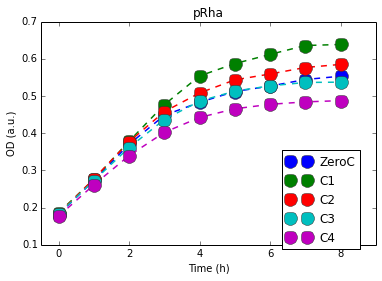

In [10]:
P = 'Rha'
Cases= {}

Cases[P] = ['ZeroC', 'C1', 'C2', 'C3', 'C4']
for C in Cases[P]:
    pl.plot(np.mean(np.array(oddata[P][allCols(P,C)]), axis=1), 
        'o--', lw=1.5, markersize=13., markeredgecolor=(0.2,0.2,0.2), label=C)

pl.title('pRha')
pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('OD (a.u.)')
pl.legend(bbox_to_anchor=(0.97, 0.45))
pl.show()
pl.show()

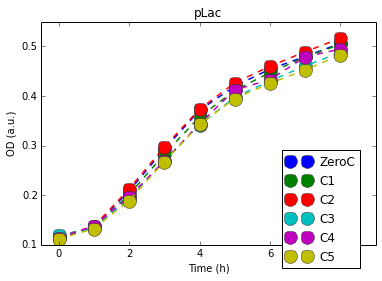

In [11]:
P = 'Lac'
Cases= {}

Cases[P] = ['ZeroC', 'C1', 'C2', 'C3', 'C4', 'C5']
for C in Cases[P]:
    pl.plot(np.mean(np.array(oddata[P][allCols(P,C)]), axis=1), 
        'o--', lw=1.5, markersize=13., markeredgecolor=(0.2,0.2,0.2), label=C)

pl.title('pLac')
pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('OD (a.u.)')
pl.legend(bbox_to_anchor=(0.97, 0.45))
pl.show()
pl.show()

### Baselines: +control and NoPlasmid

Baseline for Rha:	   862 a.u.
Baseline for Lac:	   879 a.u.


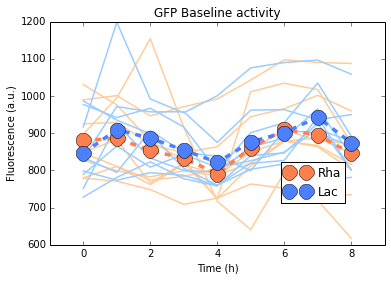

In [12]:
for P in Pidxs:
    pl.plot(fldata[P][allCols(P,'-control')], color=Pcolors_light[P], lw=1.5)

for P in Pidxs:
    pl.plot(np.mean(np.array( fldata[P][allCols(P,'-control')] ), axis=1), 
            'o--', color=Pcolors[P], lw=3.5, markersize=15, label=P)
    
    print "Baseline for " + P + ":\t %5.0f a.u." % \
    (np.mean(np.array( fldata[P][allCols(P,'-control')] ), axis=1).mean())


pl.title('GFP Baseline activity')
pl.xlabel('Time (h)')
pl.xlim(-1,9)
pl.ylabel('Fluorescence (a.u.)')
pl.legend(bbox_to_anchor=(0.9, 0.4))
pl.show()

Gfp baseline activity seems to be around 900 a.u. for all three plates.

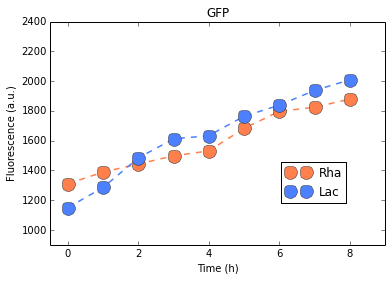

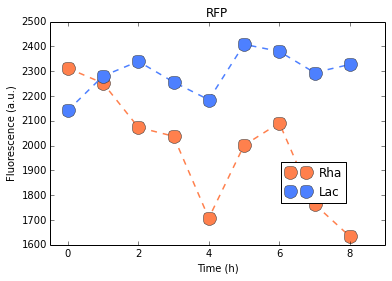

In [13]:
for P in Pidxs:
    pl.plot(np.mean(np.array( fldata[P][allCols(P,'+control')] ), axis=1), 
            'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.title('GFP')
pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('Fluorescence (a.u.)')
pl.ylim(900,2400)
pl.legend(bbox_to_anchor=(0.9, 0.4))
pl.show()


for P in Pidxs:
    pl.plot(np.mean(np.array( fldata_rfp[P][allCols(P,'+control')] ), axis=1), 
            'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.title('RFP')
pl.xlabel('Time (h)')
pl.xlim(-0.5,9.)
pl.ylabel('Fluorescence (a.u.)')
pl.legend(bbox_to_anchor=(0.9, 0.4))
pl.show()

Just to have an idea of the order of the fluorescence differences, let's evaluate the average difference between Arabinose and Rhamnose.

### Quick check on the zero-concentration data


Next, let's see how is the zero-concentration evolving.

In [14]:
NormdOD = {}
NormdOD_rfp = {}
for P in Pidxs:
    CASES = ColumnNames[P].values()
    for CASE in CASES:
        NormdOD[P + CASE] = np.array(fldata[P][allCols(P,CASE)])/np.array(oddata[P][allCols(P,CASE)])
        NormdOD_rfp[P + CASE] = np.array(fldata_rfp[P][allCols(P,CASE)])/np.array(oddata[P][allCols(P,CASE)])

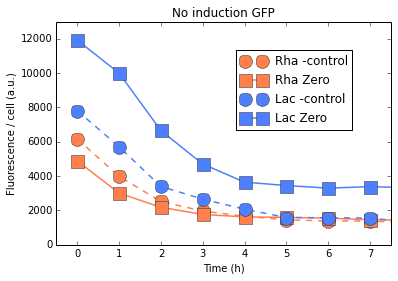

In [15]:
for P in Pidxs:
    pl.plot(np.mean( NormdOD[P+'-control'], axis=1), 
            'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P+' -control')
    
    pl.plot(np.mean( NormdOD[P+'ZeroC'], axis=1), 
            's-', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P+' Zero')

pl.title('No induction GFP')
pl.xlabel('Time (h)')
pl.xlim(-0.5,7.5)
pl.ylabel('Fluorescence / cell (a.u.)')
pl.ylim(0,13000)
pl.legend(bbox_to_anchor=(0.9, 0.9))
pl.show()

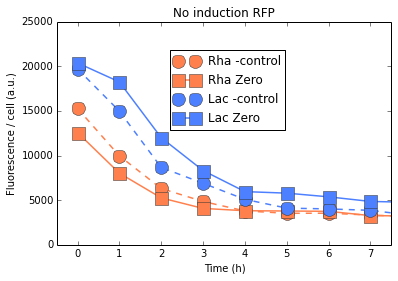

In [16]:
for P in Pidxs:
    pl.plot(np.mean( NormdOD_rfp[P+'-control'], axis=1), 
            'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P+' -control')
    
    pl.plot(np.mean( NormdOD_rfp[P+'ZeroC'], axis=1), 
            's-', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P+' Zero')

pl.title('No induction RFP')
pl.xlabel('Time (h)')
pl.xlim(-0.5,7.5)
pl.ylabel('Fluorescence / cell (a.u.)')
#pl.ylim(700,1400)
pl.legend(bbox_to_anchor=(0.7, 0.9))
pl.show()

### Preparing and normalizing promoter data

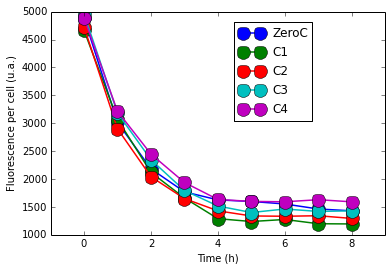

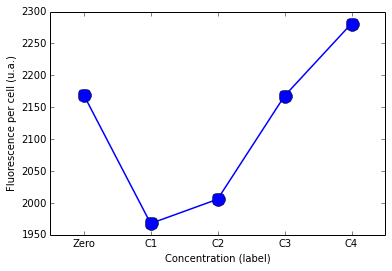

In [17]:
P = 'Rha'

Cj_ts = np.mean( NormdOD[P+'ZeroC'] , axis=1)
mds = [Cj_ts.mean()]
pl.plot( Cj_ts, 'o-', lw=1.5, markersize=13., label='ZeroC')

Concs = ['Zero', 'C1', 'C2', 'C3', 'C4']
for j in Concs[1:]:
    Cj_ts = np.mean( NormdOD[P+j] , axis=1)
    pl.plot( Cj_ts, 'o-', lw=1.5, markersize=13., label=j)
    mds.append( Cj_ts.mean() )
    
pl.xlim(-1,9)
pl.xlabel('Time (h)')
pl.ylabel('Fluorescence per cell (u.a.)')
pl.legend(bbox_to_anchor=(0.8, 0.98))
pl.show()


pl.plot(range(1,6), mds, 'o-', lw=1.5, markersize=13.)
pl.xlim(0.5,5.5)
pl.xticks(range(1,6), Concs)
pl.xlabel('Concentration (label)')
#pl.ylim(3000, 3500)
pl.ylabel('Fluorescence per cell (u.a.)')
pl.show()

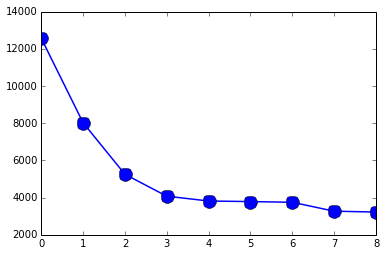

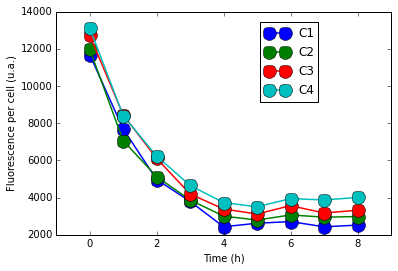

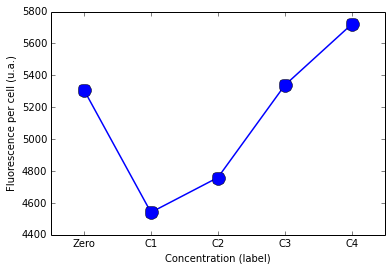

In [48]:
P = 'Rha'

Cj_ts = np.mean( NormdOD_rfp[P+'ZeroC'] , axis=1)
mds = [Cj_ts.mean()]
pl.plot( Cj_ts, 'o-', lw=1.5, markersize=13., label='ZeroC')

pl.show()

Concs = ['Zero', 'C1', 'C2', 'C3', 'C4']
for j in Concs[1:]:
    Cj_ts = np.mean( NormdOD_rfp[P+j] , axis=1)
    pl.plot( Cj_ts, 'o-', lw=1.5, markersize=13., label=j)
    mds.append( Cj_ts.mean() )
    
pl.xlim(-1,9)
pl.xlabel('Time (h)')
pl.ylabel('Fluorescence per cell (u.a.)')
pl.legend(bbox_to_anchor=(0.8, 0.98))
pl.show()


pl.plot(range(1,6), mds, 'o-', lw=1.5, markersize=13.)
pl.xlim(0.5,5.5)
pl.xticks(range(1,6), Concs)
pl.xlabel('Concentration (label)')
#pl.ylim(3000, 3500)
pl.ylabel('Fluorescence per cell (u.a.)')
pl.show()

In [45]:
def activitySummary(P, Concs, ax1yi = [0.7,1.3], ax2yi = [0.7,1.1], ax3yi = [0.8, 1.4]):
    
    f, (ax1, ax2, ax3, ax4) = pl.subplots(1, 4, figsize=(16,3.5))
    
    ZeroLevel = np.mean( NormdOD[P+'ZeroC'] , axis=1)
    mds = [1]
    ZeroLevelr = np.mean( NormdOD_rfp[P+'ZeroC'] , axis=1)
    mdsr = [1]
    
    for j in Concs:
        Cj_ts = np.mean( NormdOD[P+j] / ZeroLevel, axis=1 ) 
        Cj_tsr = np.mean( NormdOD_rfp[P+j] / ZeroLevelr , axis=1 )
        ax1.plot( Cj_ts, 'o-', lw=1.5, markersize=13., label=j)
        ax3.plot( Cj_tsr, 'o-', lw=1.5, markersize=13., label=j)
        mds.append( Cj_ts[2:].mean() )
        mdsr.append( Cj_tsr[2:].mean() )
    
    ax1.set_title('GFP')
    ax3.set_title('RFP')
    ax1.set_xlim(-1,9)
    ax3.set_xlim(-1,9)
    ax1.set_xlabel('Time (h)')
    ax3.set_xlabel('Time (h)')
    ax1.set_ylim(ax1yi)
    ax3.set_ylim(ax2yi)
    ax1.set_ylabel('Rel.  Fluorescence (u.a.)')
    ax1.legend(bbox_to_anchor=(1.1, 0.))
    
    ax2.set_title('GFP')
    ax2.bar(np.array(range(0,len(mds))) - 0.4, mds, 0.8, color=(0.5,0.7,1.0))
    ax2.set_xlim(-1.,6)
    pl.xticks(np.array(range(0,len(mds))), ['Zero'] + Concs)
    ax2.set_xlabel('Concentration (label)')
    ax2.set_ylim(ax3yi)
    ax2.set_ylabel('')
    
    ax4.set_title('RFP')
    ax4.bar(np.array(range(0,len(mds))) - 0.4, mdsr, 0.8, color=(0.5,0.7,1.0))
    ax4.set_xlim(-1.,6)
    pl.xticks(np.array(range(0,len(mds))), ['Zero'] + Concs)
    ax4.set_xlabel('Concentration (label)')
    ax4.set_ylim(ax3yi)
    ax4.set_ylabel('')
    
    pl.show()
    
    return

Rhamnose


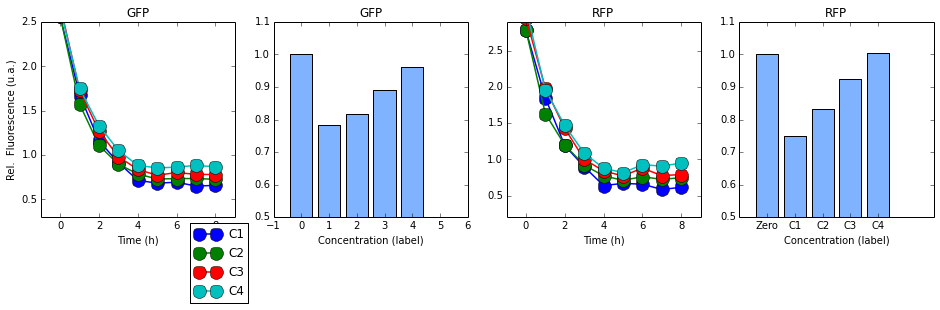

In [46]:
print 'Rhamnose'
activitySummary('Rha', ['C1','C2','C3','C4'], ax1yi = [0.3,2.5], ax2yi = [0.2,2.9], ax3yi = [0.5, 1.1])

Lac


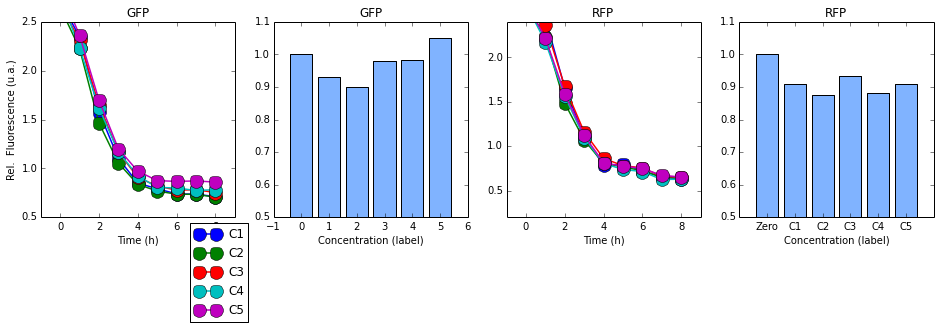

In [47]:
print 'Lac'
activitySummary('Lac', ['C1','C2','C3','C4','C5'], ax1yi = [0.5,2.5], ax2yi = [0.2,2.4], ax3yi = [0.5, 1.1])